# Binary classification

## 1. Get data ready

In [209]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torch import nn
import numpy as np

In [210]:
# Define processor device
device = 'mps' if torch.has_mps else 'cpu'

# Make 1,000 examples
n_samples = 1000

# Create corcles
# sklearn.datasets.make_circles: Make a large circle containing a smaller circle in 2d.
X, y = make_circles(n_samples, noise=0.03, random_state=42)

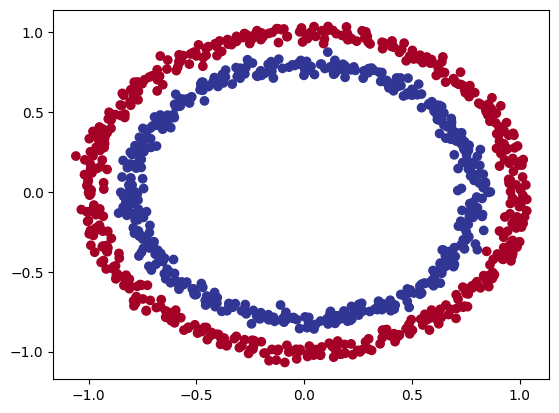

In [211]:
# Plot data
plt.scatter(X.T[0], X.T[1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [212]:
# 1.2 Turn data into tensors
# **NOTE: Numpy float dtype is float64, we must transfor it to tensor32 for pytorch use
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).unsqueeze(dim=1).to(device)

In [213]:
# Tain and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## 2. Build Moldel

In [214]:
class ClassificationModel(nn.Module):
    def __init__(self):
        # Inicialize parent class
        super().__init__()
        # Create model layers with nn.linear
        self.layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1),
        ).to(device)
    # Forward method applies layers to X matrix
    def forward(self, x):
        return self.layers(x)

# Instanciate a model
model_0 = ClassificationModel()
model_0

ClassificationModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [215]:
# class ClassificationModel(nn.Module):
#     def __init__(self):
#         # Inicialize parent class
#         super().__init__()
#         # Create model layers with nn.linear
#         self.layer_1 = nn.Linear(in_features=2, out_features=10)
#         self.layer_2 = nn.Linear(in_features=10, out_features=10)
#         self.layer_3 = nn.Linear(in_features=10, out_features=1)
#         self.relu = nn.ReLU()

#     # Forward method applies layers to X matrix
#     def forward(self, x):
#         return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# # Instanciate a model
# model_0 = ClassificationModel().to(device)
# model_0

In [216]:
# Loss function: The loss functions expects raw logits 
loss_fn = nn.BCEWithLogitsLoss()

# Optimization Function
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [217]:
# Accuracy function
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum()/len(y_true)

## 3. Fit the model to data and make predictions

In [218]:
%%time
# Setup dictionaries to store evaluation metrics
epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 6000

# Set seeds
torch.manual_seed(42)

for epoch in range(epochs):
    # 0. Set the model in training mode
    model_0.train()

    # 1. Forward pass the model and apply activation function
    y_logits = model_0(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Evaluate training loss
    loss = loss_fn(y_logits, y_train)

    # 3. Sets the gradients of all optimized torch.Tensor s to zero.
    optimizer.zero_grad()

    # 4. Backward pass the model
    loss.backward()

    # 5. Optimize the model
    optimizer.step()

    # 6. Set the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_prob = test_pred.sigmoid().round()

        # Test measure 
        test_loss = loss_fn(test_pred, y_test)
        acc = accuracy(test_prob, y_test)

    # Print out what's happening
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.detach().cpu().numpy())
        print(f'Epoch: {epoch: 5d}| Accuracy: {acc: .4f}  | Loss: {loss: 4f} | Test loss: {test_loss: 4f}')

Epoch:     0| Accuracy:  0.5000  | Loss:  0.692946 | Test loss:  0.693188
Epoch:   100| Accuracy:  0.5250  | Loss:  0.691153 | Test loss:  0.691024
Epoch:   200| Accuracy:  0.5500  | Loss:  0.689774 | Test loss:  0.689396
Epoch:   300| Accuracy:  0.5600  | Loss:  0.687949 | Test loss:  0.687232
Epoch:   400| Accuracy:  0.5650  | Loss:  0.685168 | Test loss:  0.684115
Epoch:   500| Accuracy:  0.5650  | Loss:  0.681022 | Test loss:  0.679412
Epoch:   600| Accuracy:  0.5600  | Loss:  0.675149 | Test loss:  0.672851
Epoch:   700| Accuracy:  0.5900  | Loss:  0.666589 | Test loss:  0.663216
Epoch:   800| Accuracy:  0.6750  | Loss:  0.651595 | Test loss:  0.647569
Epoch:   900| Accuracy:  0.7900  | Loss:  0.623623 | Test loss:  0.621453
Epoch:  1000| Accuracy:  0.8650  | Loss:  0.568184 | Test loss:  0.573782
Epoch:  1100| Accuracy:  0.9050  | Loss:  0.481530 | Test loss:  0.499347
Epoch:  1200| Accuracy:  0.9200  | Loss:  0.370562 | Test loss:  0.405949
Epoch:  1300| Accuracy:  0.9650  | Los

## 4. Model Tunning

## 5. Evaluate the model

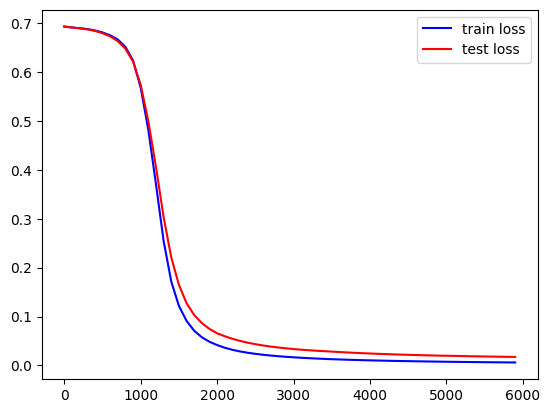

In [219]:
plt.plot(epoch_count, train_loss_values, c='b', label = 'train loss')
plt.plot(epoch_count, test_loss_values, c='r', label = 'test loss')
plt.legend();

In [220]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


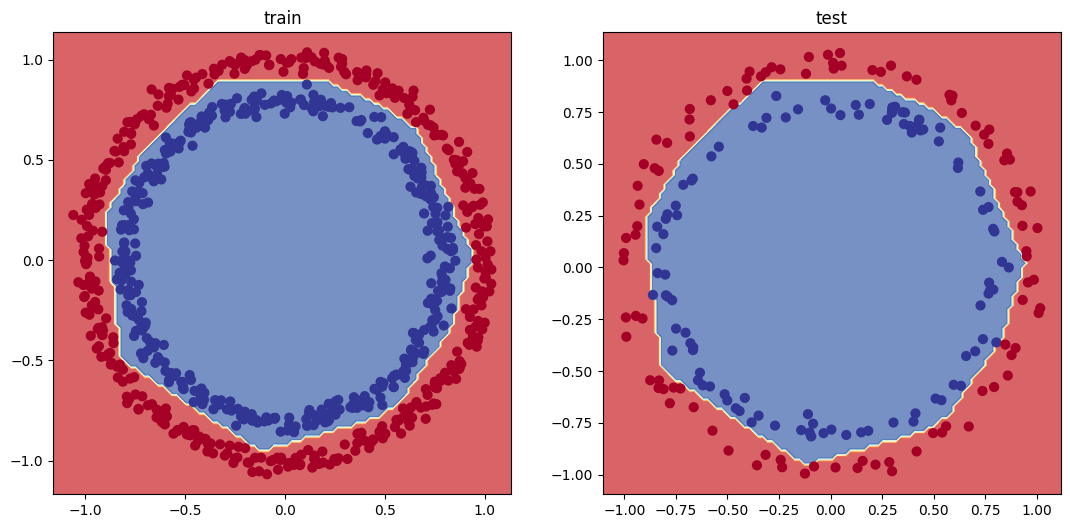

In [221]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_0, X_test, y_test)

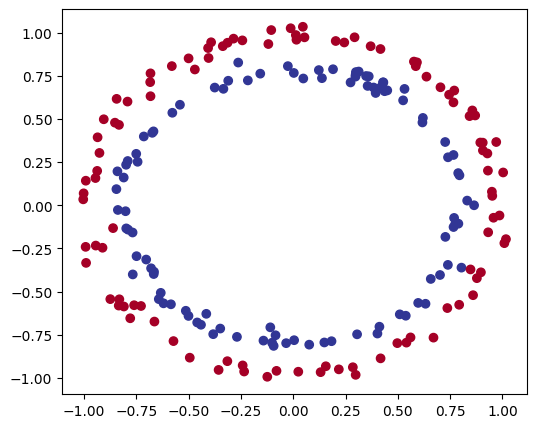

In [222]:
# Put everything to CPU (works better with NumPy + Matplotlib)
model_0.to(device)
X, y = X.to(device), y.to(device)

# Predictions
test_logits = model_0(X_test).squeeze()
y_pred = torch.round(torch.sigmoid(test_logits)).cpu().detach().numpy()

# Plot data
plt.figure(figsize=(6, 5))
plt.scatter(X_test.cpu().detach().numpy().T[0], X_test.cpu().detach().numpy().T[1], c=y_pred, cmap=plt.cm.RdYlBu)
plt.show()

## 6. Save the model

In [223]:
import os

# Set folder and model name
folder_name = '../models'
model_name = 'ClassificationModel.pth'

# .pth: typically contains a serialized PyTorch state dictionary that contains the state of a PyTorch model, including the model's weights, biases, 
# and other parameters.

# Create folder if does not exist
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

# Define path and save model state parameters
model_path = os.path.join(folder_name, model_name)
torch.save(obj=model_0.state_dict(), f=model_path)